<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


About Dataset

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [3]:
df = df.drop('Loan_ID', axis=1)

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values in some of the categorical columns and some numerical columns. Let’s have a look at the descriptive statistics of the dataset before filling in the missing values:

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data:

In [6]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [7]:
columns_to_fill = {
    'LoanAmount': 'median',
    'Loan_Amount_Term': 'mode',
    'Credit_History': 'mode'
}

for column, fill_method in columns_to_fill.items():
    if fill_method == 'median':
        fill_value = df[column].median()
    elif fill_method == 'mode':
        fill_value = df[column].mode()[0]
    else:
        continue  # Skip if an invalid fill method is specified

    df[column].fillna(fill_value, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis


Now let’s have a look at the distribution of the loan status column:

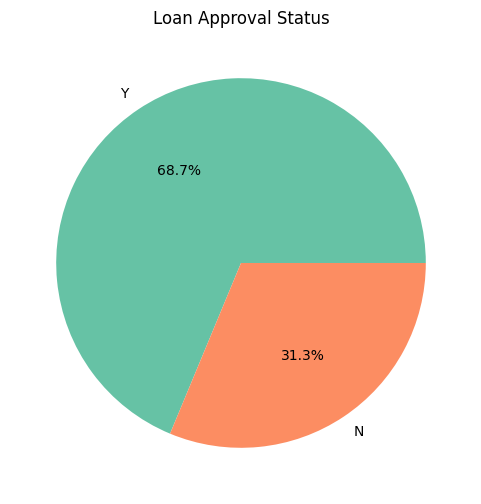

In [9]:
loan_status_count = df['Loan_Status'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('Set2')
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%')
plt.title('Loan Approval Status')

plt.show()


Now let’s have a look at the distribution of the gender column:

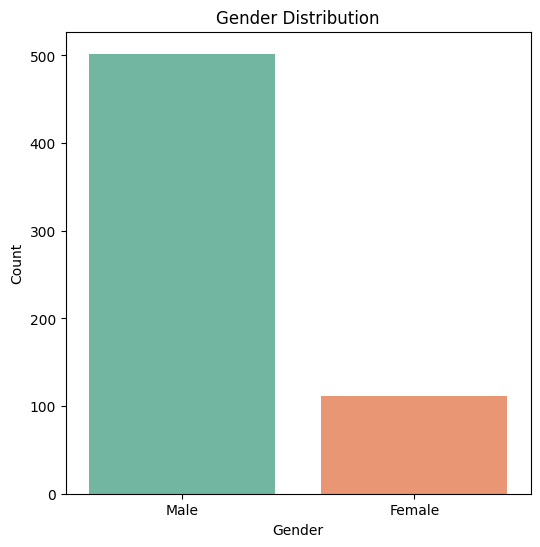

In [10]:
gender_count = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('Set2')
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


Now let’s have a look at the distribution of the martial status column:

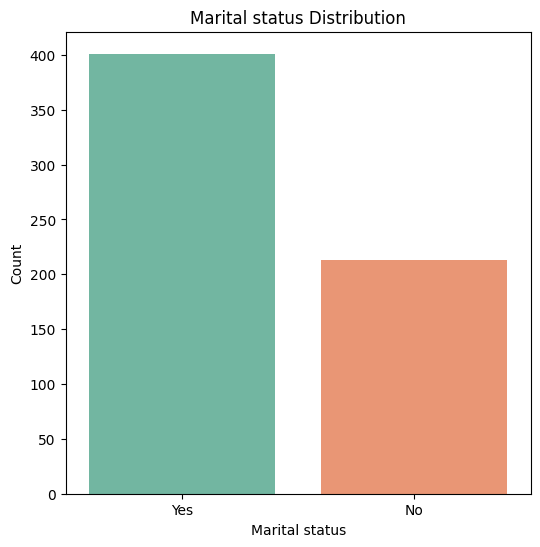

In [11]:
married_count = df['Married'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('Set2')
sns.barplot(x=married_count.index, y=married_count.values)
plt.title('Marital status Distribution')
plt.xlabel('Marital status')
plt.ylabel('Count')

plt.show()


Now let’s have a look at the distribution of the education column:

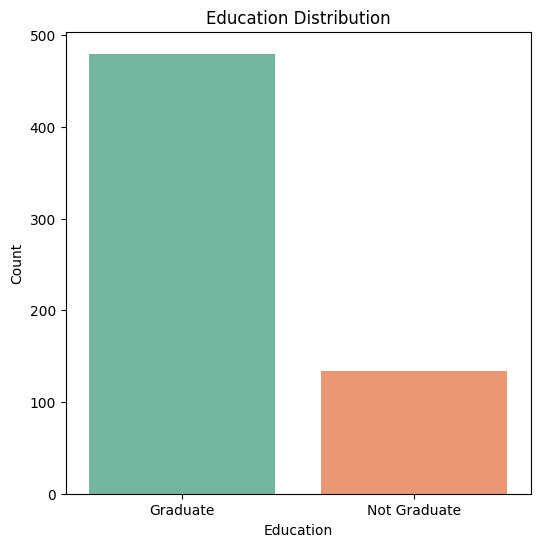

In [12]:
education_count = df['Education'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('Set2')
sns.barplot(x=education_count.index, y=education_count.values)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()


Now let’s have a look at the distribution of the self-employment column:

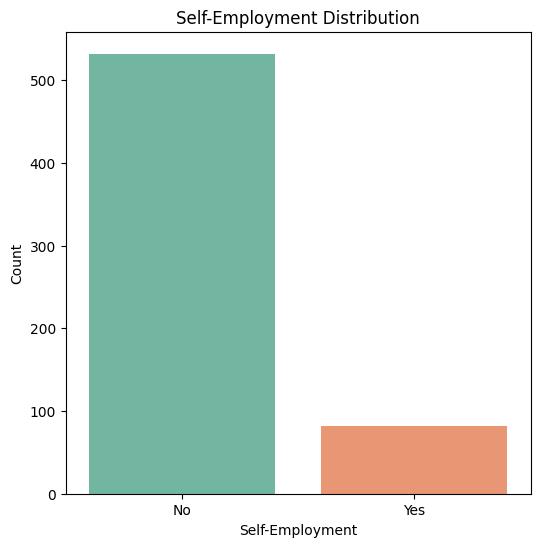

In [13]:
self_employed_count = df['Self_Employed'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('Set2')
sns.barplot(x=self_employed_count.index, y=self_employed_count.values)
plt.title('Self-Employment Distribution')
plt.xlabel('Self-Employment')
plt.ylabel('Count')

plt.show()


Now let’s have a look at the distribution of the Applicant Income column:

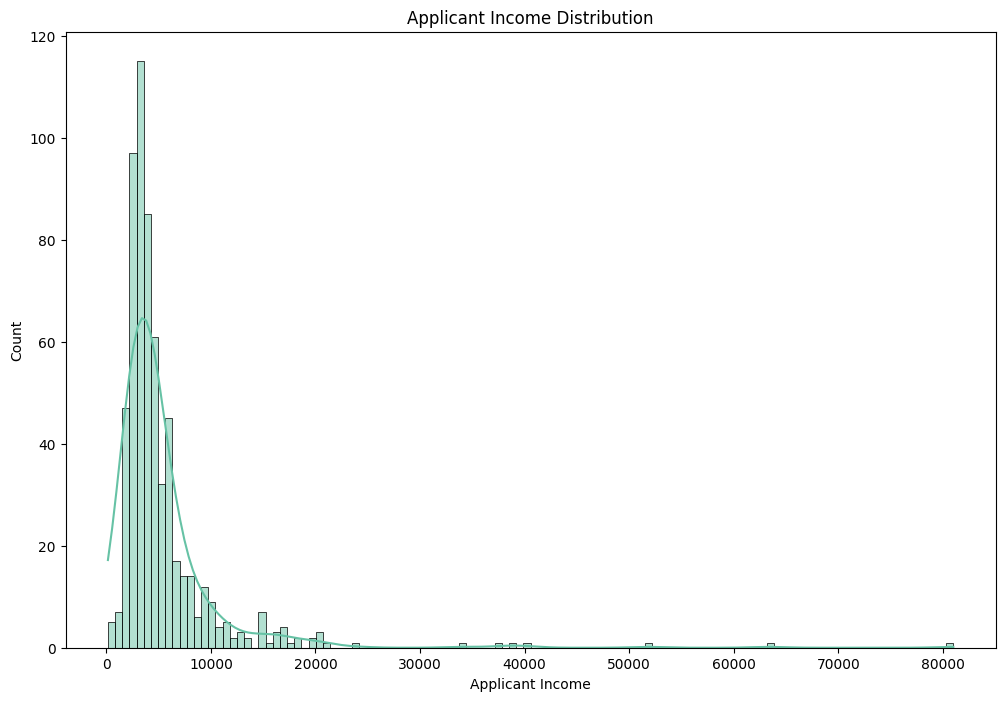

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='ApplicantIncome', kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.show()


Now let’s have a look at the relationship between the income of the loan applicant and the loan status:

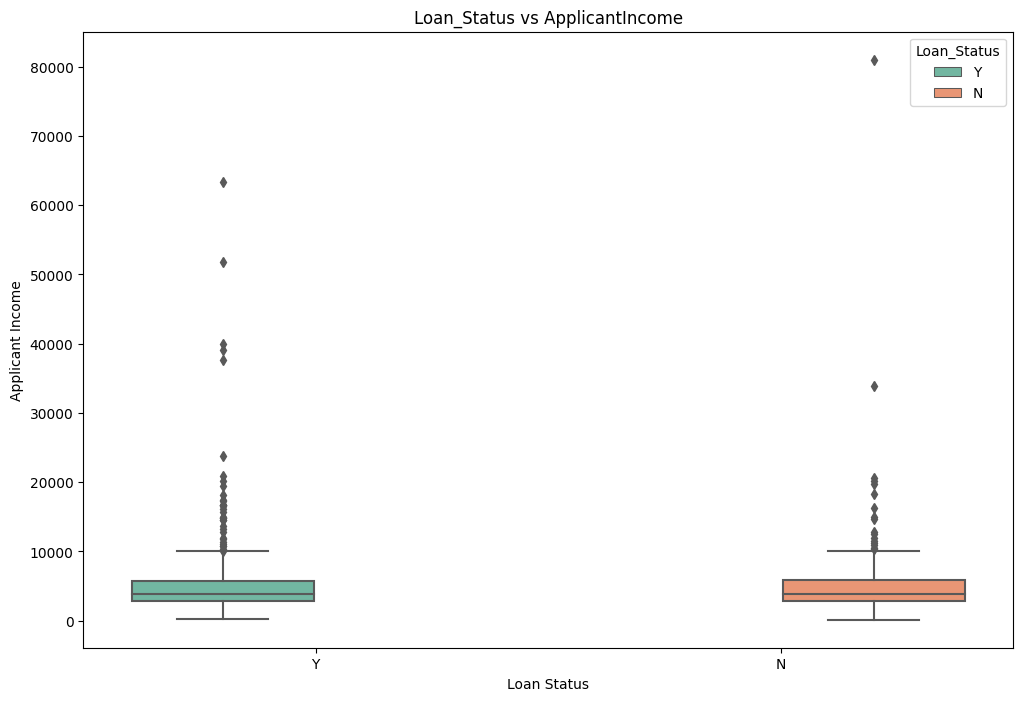

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome', hue='Loan_Status')
plt.title('Loan_Status vs ApplicantIncome')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')

plt.show()


The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

In [16]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = np.percentile(df['ApplicantIncome'], 25)
Q3 = np.percentile(df['ApplicantIncome'], 75)
IQR = Q3 - Q1

# Define the lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]


Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:

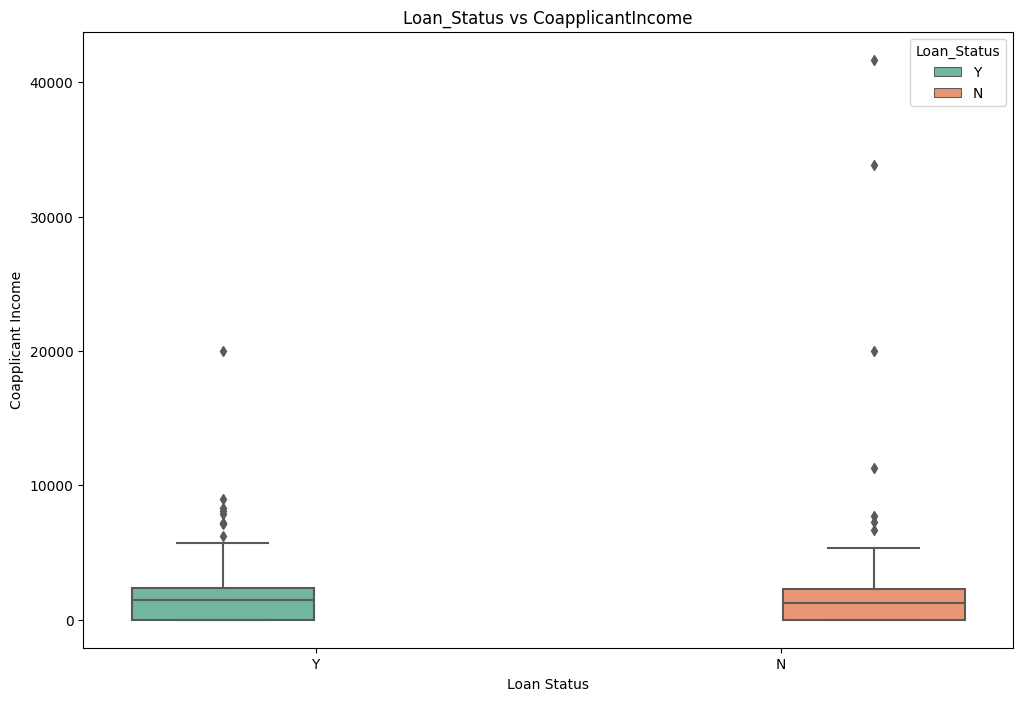

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Loan_Status', y='CoapplicantIncome', hue='Loan_Status')
plt.title('Loan_Status vs CoapplicantIncome')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')

plt.show()


The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:

In [18]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = np.percentile(df['CoapplicantIncome'], 25)
Q3 = np.percentile(df['CoapplicantIncome'], 75)
IQR = Q3 - Q1

# Define the lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]


Now let’s have a look at the relationship between the loan amount and the loan status:

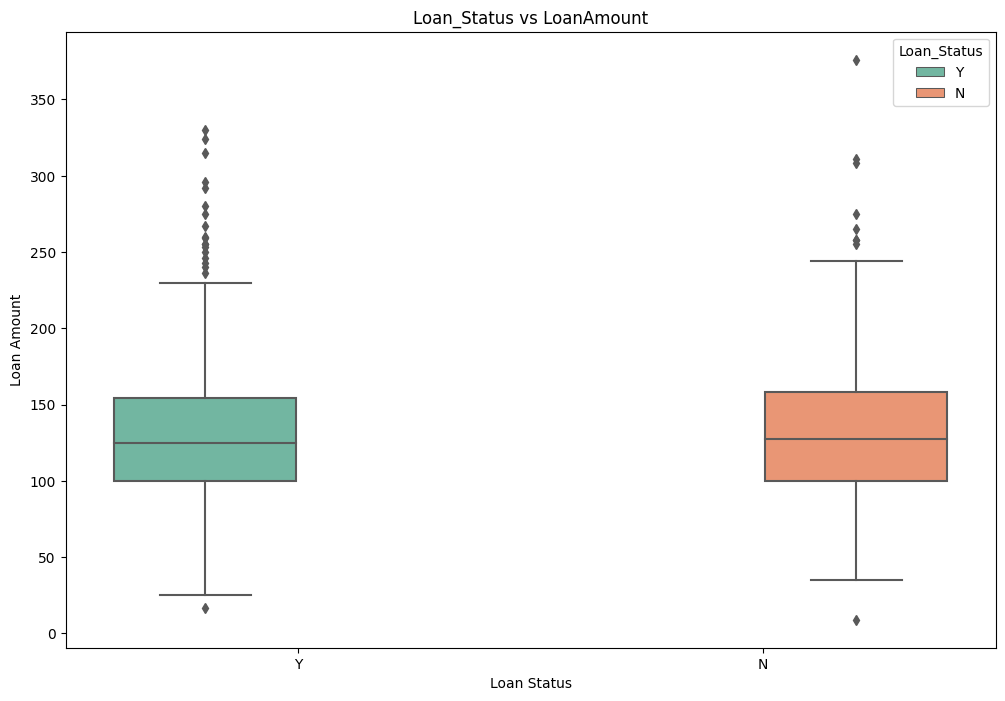

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount', hue='Loan_Status')
plt.title('Loan_Status vs LoanAmount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

plt.show()


Now let’s have a look at the relationship between credit history and loan status:

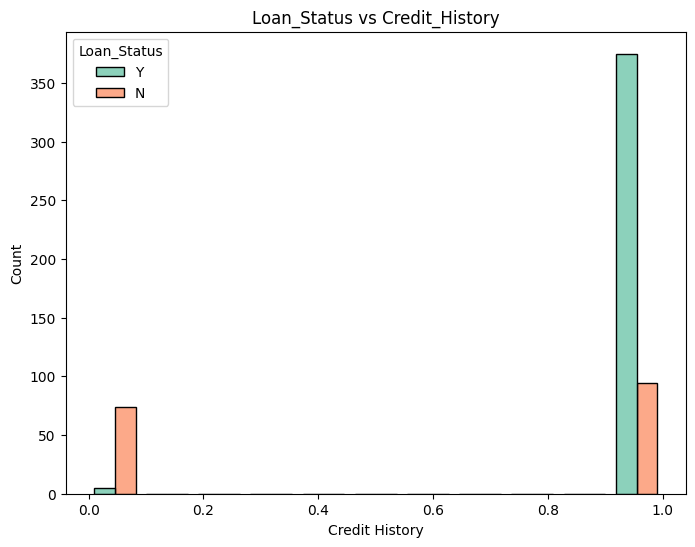

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Credit_History', hue='Loan_Status', multiple='dodge', shrink=0.8)
plt.title('Loan_Status vs Credit_History')
plt.xlabel('Credit History')
plt.ylabel('Count')

plt.show()


Now let’s have a look at the relationship between the property area and the loan status:

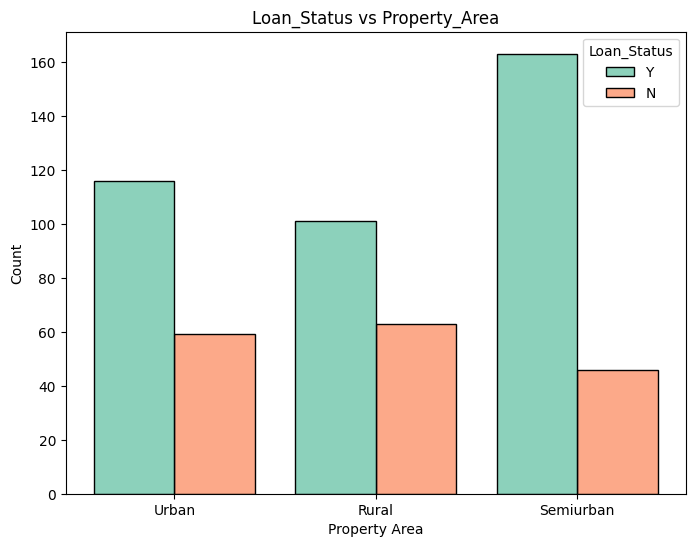

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Property_Area', hue='Loan_Status', multiple='dodge', shrink=0.8)
plt.title('Loan_Status vs Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count')

plt.show()


Data Preparation and Training Loan Approval Prediction Model

In this step:

converting categorical columns into numerical ones;

splitting the data into training and test sets;

scaling the numerical features;

training the loan approval prediction model.

In [22]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

df = pd.get_dummies(df, columns=cat_cols)


In [24]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [27]:
from sklearn.svm import SVC
model = SVC(random_state=42)


In [28]:
model.fit(X_train, y_train)


SVC(random_state=42)

Now let’s make predictions on the test set

In [29]:
y_pred = model.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

Now let’s add the predicted loan approval values to the testing set as a new column in a DataFrame called X_test_df and show the predicted loan approval values alongside the original features:

In [30]:
# Converting X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Adding the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
277        -0.544528          -0.037922   -0.983772          0.305159   
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
277        0.402248              0            1           0            1   
84         0.402248              0            1           0            1   
275        0.402248              0            1           0            1   
392        0.402248              0            1           0            1   
537        0.402248              0            1           1            0   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
277             1  ...       

Loan approval prediction involves the analysis of various factors, such as the applicant’s financial history, income, credit rating, employment status, and other relevant attributes. By leveraging historical loan data and applying machine learning algorithms, businesses can build models to determine loan approvals for new applicants.